In [93]:
from scipy.optimize import fsolve 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform




In [94]:


import numpy as np

# Step 1: Define the functions
import numpy as np
from scipy.optimize import root

# Step 1: Define the functions
def equations(x, lambda_0, lambda_2, gamma1, gamma2, q):
    x1, x2 = x
    f1 = lambda_0 * np.exp(-q * x2) - lambda_2 * (1 - np.exp(-q * x1)) - gamma1 * x1
    f2 = lambda_2 * np.exp(-q * x1) - lambda_0 * (1 - np.exp(-q * x2)) - gamma2 * x2
    return [f1, f2]

# finds closest solution to 0 in a grid system to use as initial guess 
def find_closest_solution(lambda_0, lambda_2, gamma1, gamma2, q, num_samples):
    x1_vals = np.linspace(0, 280, num_samples)
    x2_vals = np.linspace(0, 280, num_samples)

    min_distance = float('inf')
    min_x1 = None
    min_x2 = None

    for x1 in x1_vals:
        for x2 in x2_vals:
            x = [x1, x2]
            sol1, sol2 = equations(x, lambda_0, lambda_2, gamma1, gamma2, q)
            distance = np.sqrt(sol1 ** 2 + sol2 ** 2)

            # Check if the current distance is smaller than the current minimum
            if distance < min_distance:
                min_distance = distance
                min_x1 = x1
                min_x2 = x2

    return min_x1, min_x2, min_distance


        
def find_final_solution(lambda_0, lambda_2, gamma1, gamma2, q, num_samples=1000):
    # Find the closest solution as the initial guess
    initial_guess = find_closest_solution(lambda_0, lambda_2, gamma1, gamma2, q, num_samples)[:2]


    # Use fsolve with bounds and initial guess
    result = fsolve(equations, initial_guess, args=(lambda_0, lambda_2, gamma1, gamma2, q))
    X1 = result[0]
    X2 = result[1]
    if X1 < 0:
        X1 =0
    if X2 < 0:
        X2 = 0
    return X1, X2


In [105]:
# with cdf function 

def pricing_function_q(p, q):
    Lambda_Cap = 25
    lambda_1 = Lambda_Cap +1
    lambda_0 = Lambda_Cap-1
    lambda_2 = 10
    gamma1 = 0.1
    gamma2 = 0.1
    uniform_dist = uniform(loc=10, scale=40-10)

# Calculate the cumulative distribution function (CDF) for a specific value or array of values

    iteration = 0
    prev_lambda_0 = lambda_0 

    while abs(lambda_1 - prev_lambda_0) >= 0.001:
        iteration += 1 
    #    print(iteration)

        result = find_final_solution(lambda_0, lambda_2, gamma1, gamma2, q, num_samples=50)
        X1 = result[0]
     
        X2 = result[1]
       # print('X1', X1)
       # print('X2', X2)
        prob_of_abandonment = (X1 * gamma1) / lambda_0
       # print('prob of abandonment', prob_of_abandonment)
        
        pbar = 1-uniform_dist.cdf(p/(1-prob_of_abandonment))
       # print(pbar)
        
        if pbar>1:
            pbar =1
        elif pbar<0:
            pbar=0
        
      #  print('pbar', pbar)
        lambda_1 =  Lambda_Cap * pbar
       
        prev_lambda_0 = lambda_0
        lambda_0 = lambda_1
        if pbar == 0:
            break
        
        if iteration > 100:
            print(lambda_1)
            print(prev_lambda_0)
            if abs(prev_lambda_0-lambda_1) < 0.1:
                break
        if iteration > 200:
            lambda_1=0 
            break
            
      
     #   print('lambda_1', lambda_1)
     #   print('prev lambda_0', prev_lambda_0)
     #   print(lambda_1 - prev_lambda_0)
    
    profit = lambda_1 * p
    #print('X1', X1)
    return lambda_1, profit, prob_of_abandonment, X1, pbar

In [106]:
# From the results the optimal price is in the range of 15-25 so will do again 
profits = np.array([])
lambda1_equib = np.array([])
pbars = np.array([])
poa = np.array([])
#admission_prices = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
admission_prices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#admission_prices = [5, 10, 11, 11.9, 12, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6]

for p in admission_prices:
    print(p)
    results = pricing_function_q(p, 0.05)
    print('profit', results[1])
    profits = np.append(profits, results[1])
    print('lambda1', results[0])
    lambda1_equib = np.append(lambda1_equib, results[0])
    print('pbars', results[4])
    print('poa', results[2])
    pbars = np.append(pbars, results[4])
    poa = np.append(poa, results[2])
    
print(np.argmax(profits))
print(profits[5])

1
profit 25.0
lambda1 25.0
pbars 1.0
poa 0.6000163858824985
2
profit 50.0
lambda1 25.0
pbars 1.0
poa 0.6000163858824985
3
profit 75.0
lambda1 25.0
pbars 1.0
poa 0.6000163858824985
4
profit 99.9986344538526
lambda1 24.99965861346315
pbars 0.999986344538526
poa 0.6000163858824985
5
profit 117.6430472256722
lambda1 23.528609445134443
pbars 0.9411443778053776
poa 0.5750347777073328
6
profit 133.3239209961816
lambda1 22.220653499363603
pbars 0.8888261399745442
poa 0.550063524307091
7
profit 147.3476205847826
lambda1 21.04966008354037
pbars 0.8419864033416148
poa 0.5251149053943085
8
profit 159.95826867591254
lambda1 19.994783584489067
pbars 0.7997913433795627
poa 0.5001955390806779
9
profit 171.35589520079398
lambda1 19.03954391119933
pbars 0.7615817564479732
poa 0.47529659361105353
10
profit 181.6849261075859
lambda1 18.16849261075859
pbars 0.7267397044303436
poa 0.45048329317906155
11
profit 191.0736178687022
lambda1 17.370328897154746
pbars 0.6948131558861899
poa 0.42575555226362566
12
1

20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879
9.550753601668879
20.374903293108694
20.374903293108694
9.550753601668879


KeyboardInterrupt: 

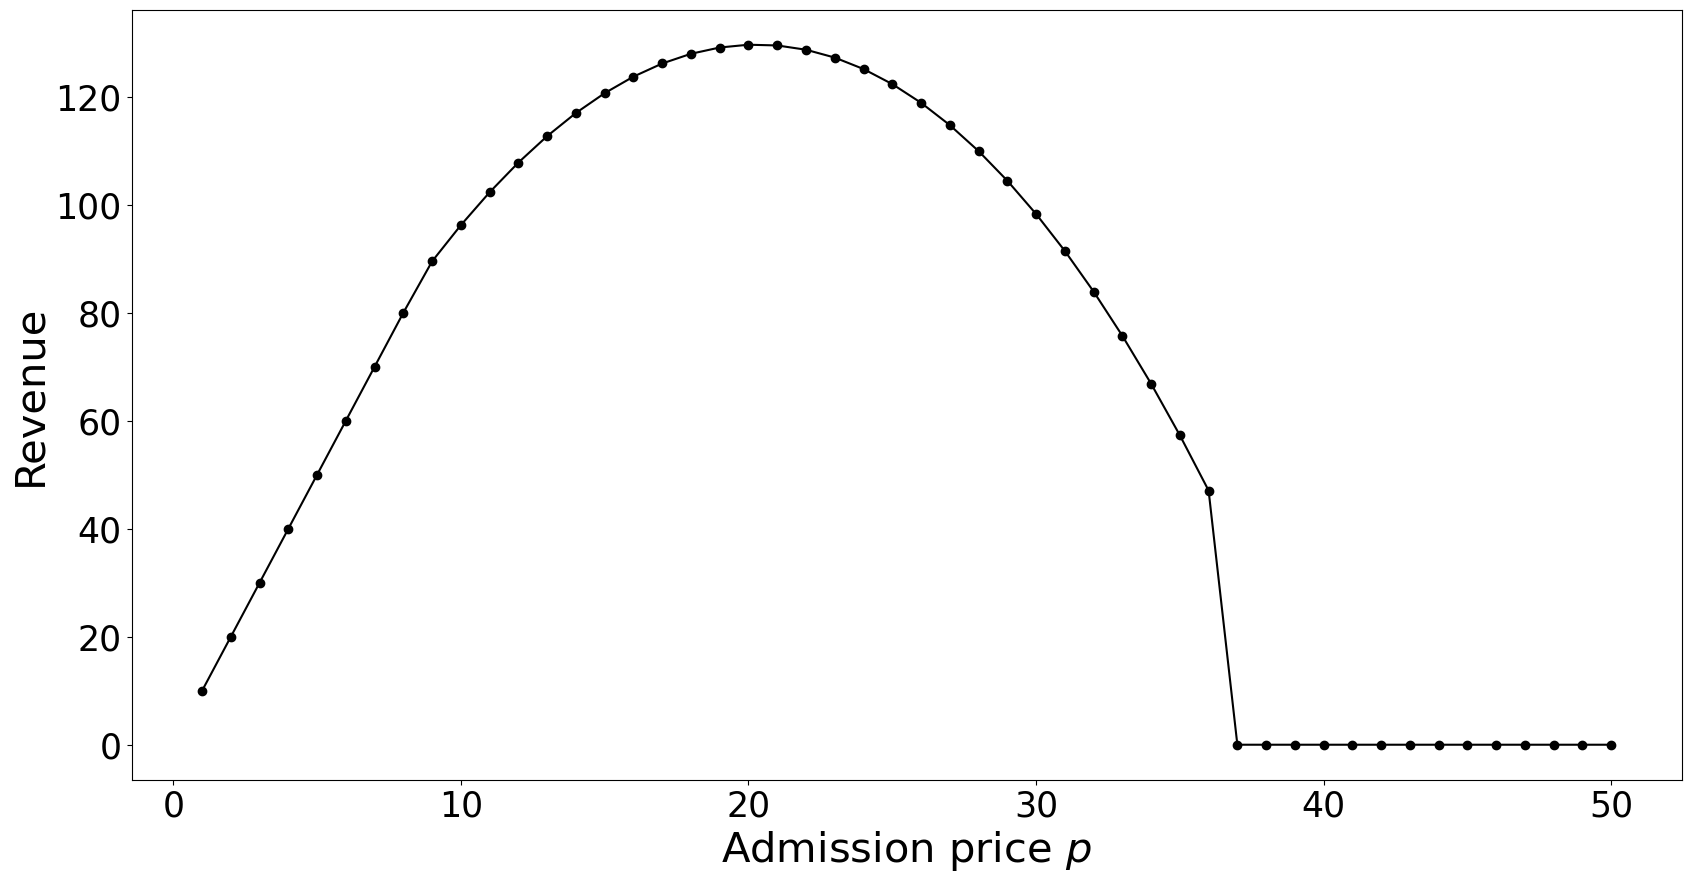

In [104]:
plt.figure(figsize=(20,10))
plt.xlabel(r'Admission price $p$', fontsize=30)
plt.ylabel('Revenue', fontsize=30)
plt.plot(admission_prices, profits, color = 'black', label='Profit', marker = 'o')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('Priceandbounds_exploration.png')
plt.show()